# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

rcParams ['figure.figsize'] = 3, 3

# Loading dataset

In [2]:
train_data = pd.read_csv (r"C:\Users\Abrar\Downloads\mnist_train.csv")
display (train_data.head (3))

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(60000, 785)

In [3]:
x_train = train_data.drop (['label'], axis=1).values
x_train.shape

(60000, 784)

In [4]:
y_train = train_data ['label'].values
y_train.shape 

(60000,)

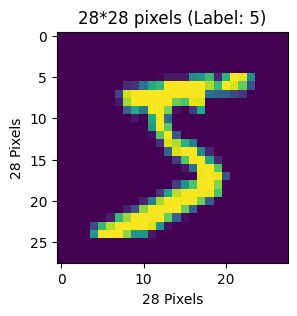

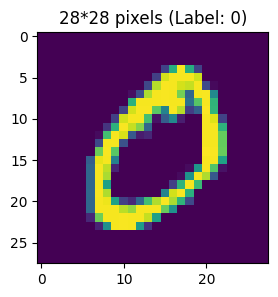

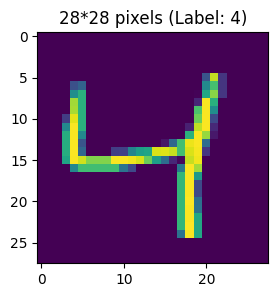

In [5]:
plt.xlabel ('28 Pixels')
plt.ylabel ('28 Pixels')
for i in range (3):
    plt.title ('28*28 pixels (Label: {})'.format (y_train [i]))
    plt.imshow (x_train [i].reshape (28, 28))
    plt.show ()

In [6]:
test_data = pd.read_csv (r"C:\Users\Abrar\Downloads\mnist_test.csv")
display (test_data.head (3))

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(10000, 785)

In [8]:
x_test = test_data.drop (['label'], axis=1).values
x_test.shape

(10000, 784)

In [9]:
y_test = test_data.label.values
y_test.shape

(10000,)

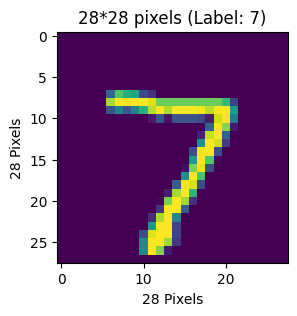

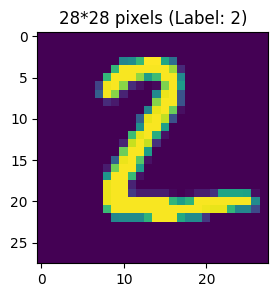

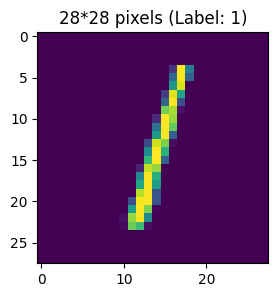

In [10]:
plt.xlabel ('28 Pixels')
plt.ylabel ('28 Pixels')
for i in range (3):
    plt.title ('28*28 pixels (Label: {})'.format (y_test [i]))
    plt.imshow (x_test [i].reshape (28, 28))
    plt.show ()

# ANN Model Building

In [11]:
model = Sequential (
    Dense (units=10, 
           input_shape=(784, ), 
           activation='softmax')
)

model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit (x_train,  y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 9.8146 - accuracy: 0.8394
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1261 - accuracy: 0.8780
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6590 - accuracy: 0.8830
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4600 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3834 - accuracy: 0.8863
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3581 - accuracy: 0.8874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2918 - accuracy: 0.8882
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2091 - accuracy: 0.8897
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0832 - accuracy: 0.8888
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.126

# Model Testing & Evaluation

In [13]:
y_pred = model.predict (x_test)
print (y_pred)

313/313 [==============================] - 1s 3ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 2.9047002e-37 ... 0.0000000e+00
  1.4301799e-36 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  6.5720347e-31 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [14]:
# Model based
model.evaluate (x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 5.6347 - accuracy: 0.8928


[5.634743690490723, 0.892799973487854]

In [15]:
y_pred_new = []
for i in range (len (y_pred)):
    y_pred_new.append (np.argmax (y_pred [i]))
print (y_pred_new)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 9, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 3, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 3, 1, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 9, 7, 9, 3, 9, 0, 3, 5, 7, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 3, 4, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1, 9, 6, 8, 2, 5, 7, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

In [16]:
#SKLearn
print (f'Accuaracy: {accuracy_score (y_test, y_pred_new)*100}%')

Accuaracy: 89.28%


# Comparing true and predicted

In [17]:
compare_df = pd.DataFrame ({'Y_test': y_test, 'Y_pred': y_pred_new})

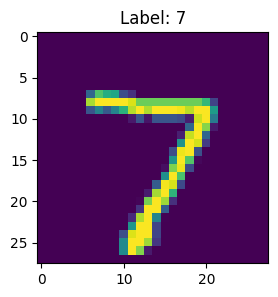

Prediction:  7


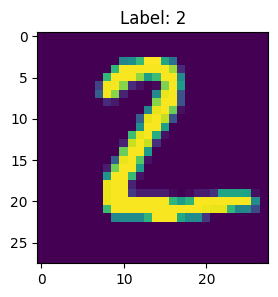

Prediction:  2


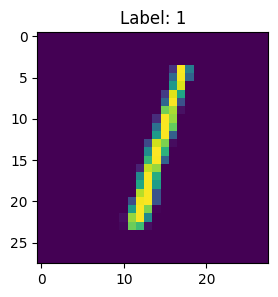

Prediction:  1


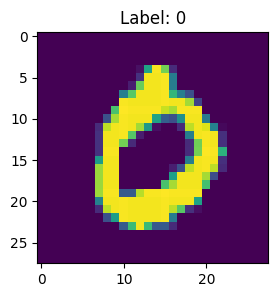

Prediction:  0


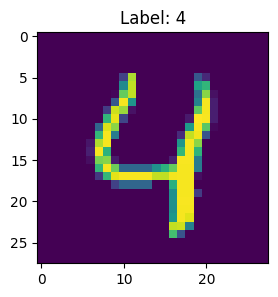

Prediction:  4


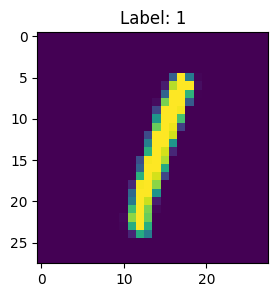

Prediction:  1


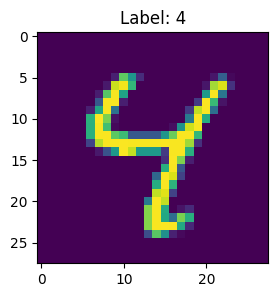

Prediction:  4


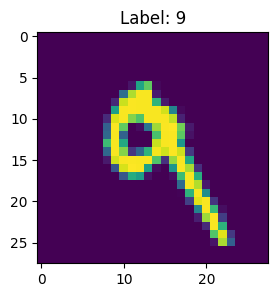

Prediction:  9


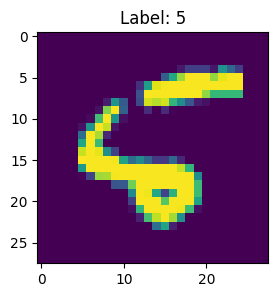

Prediction:  6


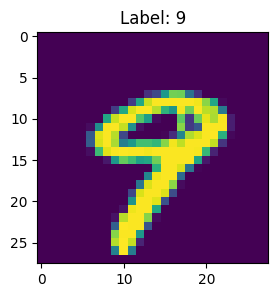

Prediction:  9


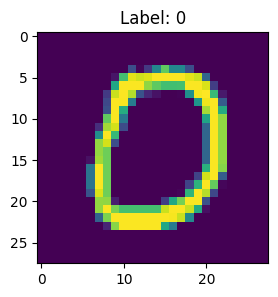

Prediction:  0


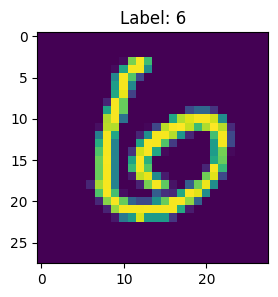

Prediction:  6


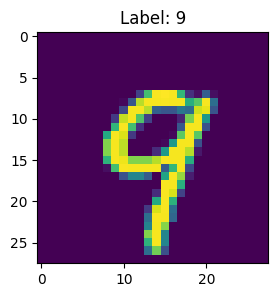

Prediction:  9


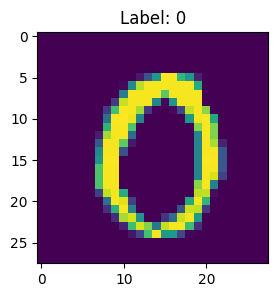

Prediction:  0


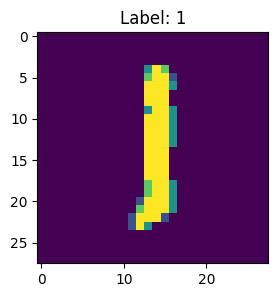

Prediction:  1


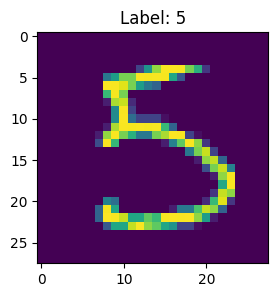

Prediction:  5


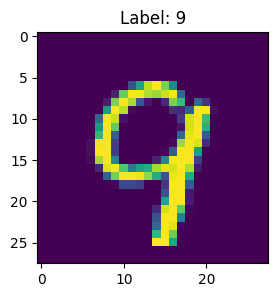

Prediction:  9


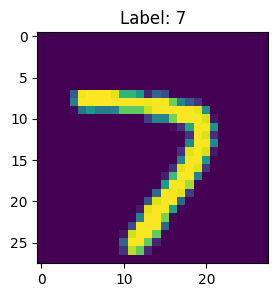

Prediction:  7


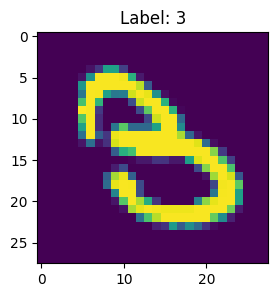

Prediction:  3


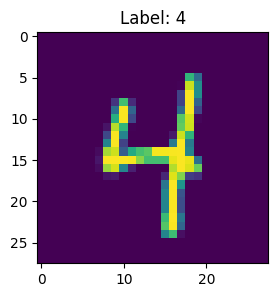

Prediction:  4


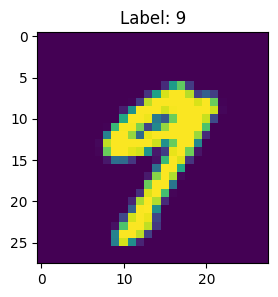

Prediction:  7


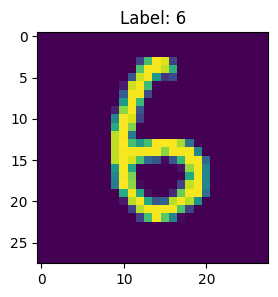

Prediction:  6


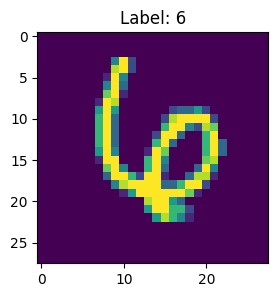

Prediction:  6


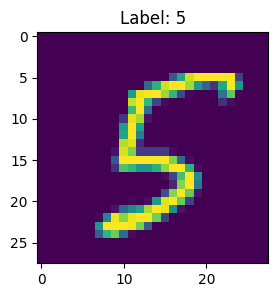

Prediction:  5


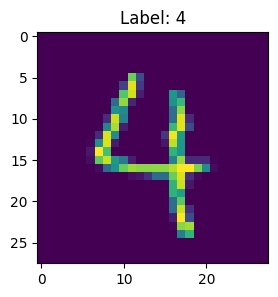

Prediction:  4


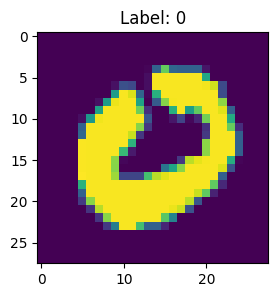

Prediction:  0


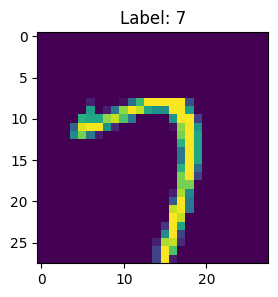

Prediction:  7


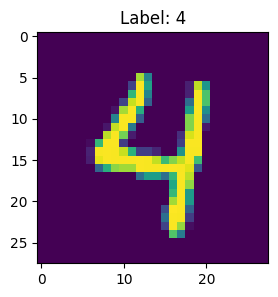

Prediction:  4


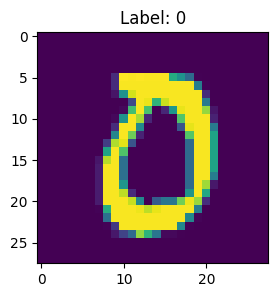

Prediction:  0


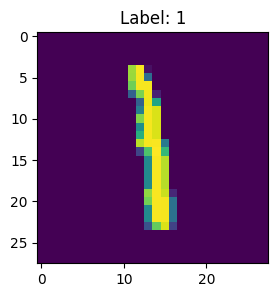

Prediction:  1


In [18]:
for i in range (30):
    plt.title ('Label: {}'.format (y_test [i]))
    plt.imshow (x_test [i].reshape (28, 28))
    plt.show ()
    print ('Prediction: ', y_pred_new [i])

In [20]:
display (compare_df)

,Y_test,Y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5
